# Solving Higher Order ODEs

## Second Order Differential Equations

In general, if we wish to solve an ODE of the form

$$
\frac{d^2y}{dx^2} = f\left(x, y, \frac{dy}{dx}\right)
$$

<!--- Problem with notation!!!!!!!!!! --->
with initial conditions $y(x = x_0) = y_0$ and $y^\prime(x = x_0) = y^\prime_0$ ,
we can transform these into a system of coupled first order equations by introducing the variable:

$$
v = \frac{dy}{dx}
$$

which gives us the equations:

$$
\begin{align*}
\frac{dy}{dx} &= v\\
\frac{dv}{dx} &= f(x, y, v)\\
\end{align*}
$$

with the initial conditions

As the ODE for $y$ depends on $v$ and the ODE for $v$ depends on $y$, these equations need to be integrated simultaneously.

### Worked Example

Consider second order ODE:

$$
\frac{d^2 y}{dt^2} + 10 \frac{dy}{dt} + 100y = 100 |\sin(t)|
$$

which we wish to solve for the initial conditions $y = 0.1$, $dy/dx = -0.5$ at $t = 0$.

Firstly let's rearrange the equation to make $y^{\prime\prime}$ the subject:

$$
\frac{d^2 y}{dt^2} = 100 |\sin(t)| - 10 \frac{dy}{dt} - 100 y
$$

We start by introducing the variables:

$$
\begin{align*}
v_0 &= y\\
v_1 &= \frac{dy}{dt} = \frac{d v_0}{dt}\\
\end{align*}
$$

in order to reduce the second order ODE to a coupled system of two first order ODEs:

$$
\begin{align*}
\frac{d v_0}{dt} &= v_1\\
\frac{d v_1}{dt} &= 100|sin(t)| - 10 v_1 - 100 v_0
\end{align*}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

t0, y0, v0 = 0, 0.1, -0.5 #initial conditions
h = 0.05 #step size
t_end = 10


#The ODE function
def f1(t, y, v):
    return v

def f2(t, y, v):
    return 100*np.abs(np.sin(t)) - 10 * v - 100 * y


#Constructing the arrays:
t_arr = np.arange(t0, t_end + h, h) #make sure it goes up to and including x_end

y_arr = np.zeros(t_arr.shape)
v_arr = np.zeros(t_arr.shape)

#Setting the initial conditions
y_arr[0] = y0
v_arr[0] = v0

#Performing the Euler method, note we don't use the last x value in the update calculations
for i,t in enumerate(t_arr[:-1]):
    y_arr[i + 1] = y_arr[i] + h * f1(t, y_arr[i], v_arr[i])
    v_arr[i + 1] = v_arr[i] + h * f2(t, y_arr[i], v_arr[i])
    
##Plotting both curves
fig, ax = plt.subplots(2,1, sharex = True, figsize = (6.4, 5))

ax[0].plot(t_arr, y_arr)

ax[0].set_ylabel('y(t)')

ax[1].plot(t_arr, v_arr)

ax[1].set_xlabel('t')
ax[1].set_ylabel("y'(t)")

plt.show()

<Figure size 640x500 with 2 Axes>

In the solution above we used separate variables to store the values for $y(x)$ and $v(x)$. In the example below, we shall see that it is more practical to store these values in a single 2D array.

## Higher Order Differential Equations

We can extend this technique of creating a system of coupled first order equations to an ODE of arbitrary order:

$$
\frac{d^n y}{d x^n} =  f\left(x, \frac{d y}{dx}, \frac{d^2y}{dx^2}, \frac{d^3y}{dx^3}, \dots, \frac{d^{n-1} y}{dx^{n-1}} \right)
$$

with initial conditions

$$
y(x = x_0) = y_0 ~~~~~~ \frac{dy}{dx}(x = x_0) = y^\prime_0 ~~~~~~ \frac{d^2y}{dx^2}(x = x_0) = y^{\prime\prime}_0 ~~~~~~ \dots ~~~~~~ \frac{d^{n-1}y}{dx^{n-1}}(x = x_0) = y^{(n-1)}_0
$$

We start by introducing the variables:

$$
v_0 = y ~~~~~~ v_1 = \frac{dy}{dx} ~~~~~~ v_2 = \frac{d^2y}{dx^2} ~~~~~~ \dots ~~~~~ v_{n-1} = \frac{d^{n-1}y}{dx^{n-1}}
$$

we can transform the order $n$ ODE to a set of $n$ first order coupled differential equations:

$$
\begin{align*}
\frac{dv_0}{dx} &= v_1\\
\frac{dv_1}{dx} &= v_2\\
\frac{dv_2}{dx} &= v_3\\
                &\vdots\\
\frac{dv_{n-2}}{dx} &= v_{n-1}\\
\frac{dv_{n-1}}{dx} &= f(x, v_0, v_1, v_2, v_3, \dots, v_{n-2}, v_{n-1})\\
\end{align*}
$$

As the subscripts suggest, it is practical to store the $v_i$ values in a vector. 

These equations can be integrated simultaneously, and the solution for $y$ given by $v_0$.

### Worked Example

Consider the order 3 ODE:

$$
\frac{d^3 y}{dx^3} + y \frac{d^2 y}{dx^2} = 0
$$

with the initial conditions $y = 1$, $\tfrac{d}{dx}y = 0.5$ and $\tfrac{d^2}{dx^2} y = 0.7$ at $x = 0$.

To solve this we introduce the variables:

$$
\begin{align*}
y_0 &= y\\
y_1 &= \frac{d y}{dx}\\
y_2 &= \frac{d^2y}{dx^2}
\end{align*}
$$

This gives us the system of equations:

$$
\begin{align*}
\frac{dy_0}{dx} &= y_1\\
\frac{dy_1}{dx} &= y_2\\
\frac{dy_2}{dx} &= -y_0 y_2
\end{align*}
$$

The solution in Python is:

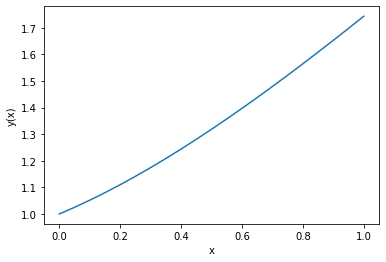

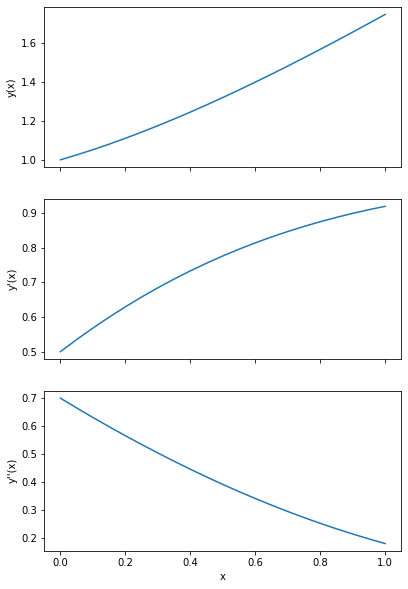

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x0, y0 = 0, [1, 0.5, 0.7] #initial conditions
h = 0.05
x_end = 1

##The ODE function (takes y as an array and returns an array of values)

def f(x, y):
    return np.array([
        y[1],
        y[2],
        - y[0] * y[2],
    ])


#Contructing the arrays
x_arr = np.arange(x0, x_end + h, h)

y_arr = np.zeros((x_arr.size, len(y0))) #Using y instead of v as there is no ambiguity
y_arr[0, :] = y0 #setting the initial conditions


#Performing the Euler method, note we don't use the last x value in the update calculations
for i,x in enumerate(x_arr[:-1]):
    y_arr[i+1, :] = y_arr[i, :] + h*f(x, y_arr[i, :])

    
##Plotting the solution for y(x) only
fig1, ax1 = plt.subplots()

ax1.plot(x_arr, y_arr[:, 0])

ax1.set_xlabel('x')
ax1.set_ylabel('y(x)')

plt.show()

##Plotting the solutions to the derivatives
fig2, ax2 = plt.subplots(len(y0),1, sharex = True, figsize = (6.4, 10))


for i in range(len(y0)):
    ax2[i].plot(x_arr, y_arr[:, i])
    
    ax2[i].set_ylabel('y{}(x)'.format("'"*i))

ax2[-1].set_xlabel('x')

plt.show()